**Ejercicio 1**

Tenemos una cuerda de longitud L, densidad lineal u, sometida a una tension T.
Vimos que la solucion mas general para un modo es de la pinta

$${\psi(x,t)=A\,sin(kx+\phi)\,cos(\omega t+\theta)}$$

Como los extremos de esta cuerda estan fijos entonces aplicamos las debidas condiciones de contorno. Para el extremo en $x=0$

$${\psi(0,t)=A\,sin(\phi)\,cos(\omega t+\theta)=0}$$

con lo que podemos tomar $\phi=0$ sin perder generalidad. Para el extremo en $x=L$, de forma analoga
$${\psi(L,t)=A\,sin(kL)\,cos(\omega t+\theta)=0}$$

y de aqui despejamos nuestro numero de onda $k=\frac{p\pi}{L}$ con lo que tambien queda definido $\omega=\frac{k}{v}.$


Pero todavia nos falta averiguar el valor de $A$ y de $\theta$, los cuales dependen de las condiciones iniciales. Segun el enunciado, la cuerda se suelta a partir del reposo con una deformacion limitada a su tercio dentral, con forma de medio sinusoide.
Esto define dos condiciones iniciales, una para la velocidad:
$${\partial_t\psi(x,0)=0}$$
y otra para la posicion:
$${
\psi(x,0)= \left\{ \begin{array}{lcc}
             0 &   si  & x < 2 \\
             \\ -hsin(\frac{3}{L}\pi) &  si & \frac{L}{3} \leq x < \frac{2}{3}L
             \end{array}
   \right.
}$$

Con las propiedades de ortogonalidad de las series de Fourier, realizamos las cuentas, ya hechas en clase (multiplicamos por $cos(k_qx)$ o $sin(k_qx)$, segun el caso, e integramos a ambos lados de la igualdad). Con esto obtenemos las incognitas $A$ y $\theta$. Quedan definidas como
$${\theta=0}$$
y
$${
A= \left\{ \begin{array}{lcc}
             -\frac{h}{3} &   si  & p = 3 \\
            \\ \frac{6h}{\pi(9-p^2)}(sin(\frac{2}{3}p\pi)+sin(\frac{1}{3}p\pi)) &  si & p\neq3 \\
             \end{array}
   \right.
}$$

Por lo tanto, ya con estas incognitas despejadas podemos escribir nuestra solucion completa
$${\Psi(x,t)=\sum_{p=1}^{\infty}A\,sin(\frac{p\pi}{L}x)\,cos(\frac{k}{v} t).}$$

A continuacion animamos $\Psi(x,t)$ para ver la evolucion a travez del tiempo. Lo animo con p=60 para mostrar algunos resultados y luego hablo de la convergencia de estos.


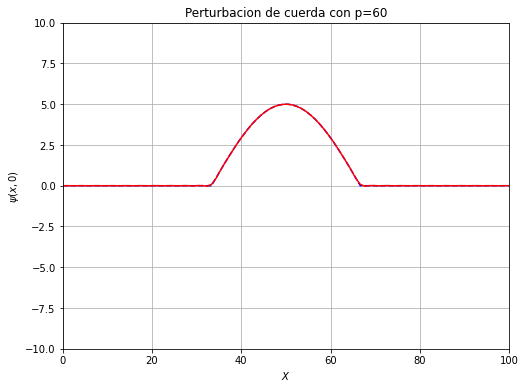

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML;
#Animacion

#Parametros y grillas
h=5
T = 0.5
u = 1
L=100
pmax=60
v = T/u
x = np.linspace(0, L, 100)
t = np.linspace(0, 1000, 100)
condicion_inicial= np.piecewise(x,[(x<2*L/3) & (x>=L/3)], [lambda x: -h*np.sin(x*np.pi*3/L), lambda x: 0])


rc('animation', html='html5');
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('$X$')
ax.set_xlim([0,100])
ax.set_title("Perturbacion de cuerda con p=60")
ax.set_ylabel('$\psi (x,0)$')
ax.set_ylim([-10,10])
ax.grid(True)
ax.plot(x, condicion_inicial, color="blue",linestyle="--")
linea, = ax.plot([],[],'-',color = 'r', label = 'Cuerda')

#funcion para graficar cada imagen de la animacion:

def graficar(i):
  psi1=0 ## para iniciar la iteracion
  for p in range(1, pmax):
      if p==3:
        A= -h/3
      else:
        A=((6*h)/(np.pi*(9-p**2)))*(np.sin((2*np.pi/3)*p)+ np.sin((np.pi/3)*p))
      k = p* np.pi/L
      w=v*k
      psi=A*np.sin(k*x)*np.cos(w*t[i])
      psi1=psi1+psi

  linea.set_data(x, psi1)

  return (linea,)
anim = animation.FuncAnimation(fig, graficar, frames=100, interval=100)
anim




En esta animacion vemos el comportamiento de la cuerda. Pero, ¿como podemos hacer para interpretar estos resultados?

Resulta de mucha ayuda interpretarlos en terminos de la formula de d'Alembert. En este proceso, a partir de imponer las condiciones iniciales en nuestro $\psi(x,t)$, logramos reescribirla como
$${\psi(x,t)=\frac{1}{2}[\psi(x-vt,0)+\psi(x+vt,0)]+\frac{1}{2v}\int_{x-vt}^{x+vt}\frac{{\partial \psi(x,0)}}{{\partial t}}dx}$$

Reemplazando nuestra perturbacion aqui, y teniendo en cuenta que $\partial_t\psi(x,0)=0$ podemos obtener
$${\psi(x,t)=\sum_{p=1}^{\infty}\frac{1}{2}Asin(kx-vt)+\sum_{p=1}^{\infty}\frac{1}{2}Asin(kx+vt)}$$

Por lo que ahora es mas intuitivo ver algunas de las siguientes situaciones.Por ejemplo, a t=0, reemplazando en la nueva $\psi(x,t)$ que obtuvimos, vemos que los terminos de vt se anulan y obetenemos asi una sinusoide. Lo mismo sucedera para para otro tiempo solo que la sinusoide se encontrara invertida ya que los senos seran negativos.


<figure>
<left>
<img src='https://drive.google.com/uc?id=1GWgX-90WC3OO-qaehDx6hwBh18Ntatqq'width="700" height="400"/>
</left>
</figure>

En este otro caso, entendemos como para un tiemp tn tenemos dos sinusoides, y esto lo vemos en $\psi(x,t)$ al tener un termino (x-vt), sinoide que se encuentra desplazada vt hacia la derecha y un termino (x+vt), sinusoide que se encuentra desplazada vt hacia la izquierda. Ambas con la mitad de la amplitud A.

<figure>
<left>
<img src='https://drive.google.com/uc?id=1dIXFvLIAk6APRRrkeaEVCIcDJizk6ptS'width="700" height="400"/>
</left>
</figure>


Es posible tambien mostrar la convergencia del resultado observando diferentes situacions. Si vemos como es nuestra animacion para distintos valores de p, observamos que para valores mayores que p=50 podemos asegurar que la perturbacion se mantendra igual.

(Aclaracion: Supuse que a esto se referia con convergencia de los resultados, se me ocurrio tambien tomar imagenes de la condicion inicial y ver como por fourier se iba aprofimando la funcion cada vez mejor a esta, pero preferi hacer las animaciones para estar seguro, de todas maneras, es la misma idea.)





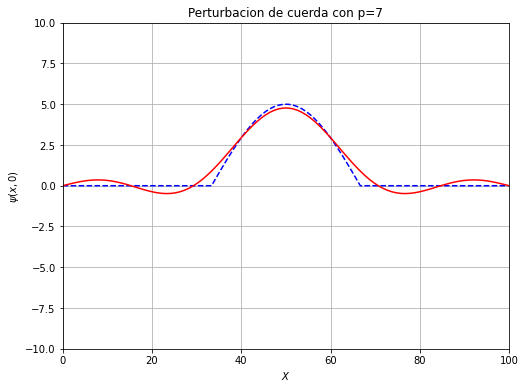

In [ ]:
rc('animation', html='html5');
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('$X$')
ax.set_xlim([0,100])
ax.set_title("Perturbacion de cuerda con p=7")
ax.set_ylabel('$\psi (x,0)$')
ax.set_ylim([-10,10])
ax.grid(True)
ax.plot(x, condicion_inicial, color="blue",linestyle="--")
linea, = ax.plot([],[],'-',color = 'r', label = 'Cuerda')
pmax=7
def graficar(i):
  psi1=0 ## para iniciar la iteracion
  for p in range(1, pmax):
      if p==3:
        A= -h/3
      else:
        A=((6*h)/(np.pi*(9-p**2)))*(np.sin((2*np.pi/3)*p)+ np.sin((np.pi/3)*p))
      k = p* np.pi/L
      w=v*k
      psi=A*np.sin(k*x)*np.cos(w*t[i])
      psi1=psi1+psi

  linea.set_data(x, psi1)

  return (linea,)
anim = animation.FuncAnimation(fig, graficar, frames=100, interval=100)
anim


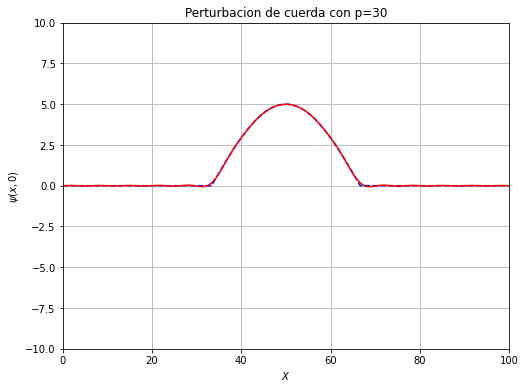

In [ ]:
rc('animation', html='html5');
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('$X$')
ax.set_xlim([0,100])
ax.set_title("Perturbacion de cuerda con p=30")
ax.set_ylabel('$\psi (x,0)$')
ax.set_ylim([-10,10])
ax.grid(True)
ax.plot(x, condicion_inicial, color="blue",linestyle="--")
linea, = ax.plot([],[],'-',color = 'r', label = 'Cuerda')
pmax=30
def graficar(i):
  psi1=0 ## para iniciar la iteracion
  for p in range(1, pmax):
      if p==3:
        A= -h/3
      else:
        A=((6*h)/(np.pi*(9-p**2)))*(np.sin((2*np.pi/3)*p)+ np.sin((np.pi/3)*p))
      k = p* np.pi/L
      w=v*k
      psi=A*np.sin(k*x)*np.cos(w*t[i])
      psi1=psi1+psi

  linea.set_data(x, psi1)

  return (linea,)
anim = animation.FuncAnimation(fig, graficar, frames=100, interval=100)
anim


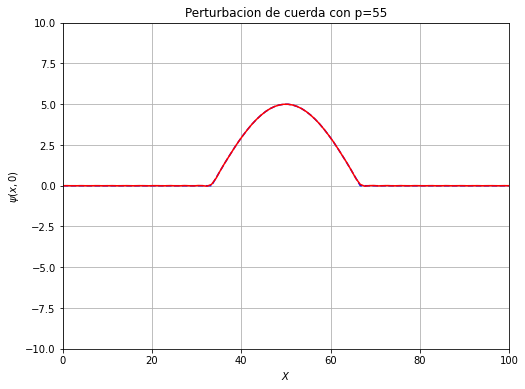

In [ ]:
rc('animation', html='html5');
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('$X$')
ax.set_xlim([0,100])
ax.set_title("Perturbacion de cuerda con p=55")
ax.set_ylabel('$\psi (x,0)$')
ax.set_ylim([-10,10])
ax.grid(True)
ax.plot(x, condicion_inicial, color="blue",linestyle="--")
linea, = ax.plot([],[],'-',color = 'r', label = 'Cuerda')
pmax=55
def graficar(i):
  psi1=0 ## para iniciar la iteracion
  for p in range(1, pmax):
      if p==3:
        A= -h/3
      else:
        A=((6*h)/(np.pi*(9-p**2)))*(np.sin((2*np.pi/3)*p)+ np.sin((np.pi/3)*p))
      k = p* np.pi/L
      w=v*k
      psi=A*np.sin(k*x)*np.cos(w*t[i])
      psi1=psi1+psi

  linea.set_data(x, psi1)

  return (linea,)
anim = animation.FuncAnimation(fig, graficar, frames=100, interval=100)
anim


**Ejercicio 2**



Consideramos las oscilaciones transversales de una cadena lineal con N+2 bolitas equiespaciadas. Observando la figura 3.1 del apunte, cada bolita tiene dos vecinos, excepto las de los extremos. Esto quiere decir que planteando newton para estas bolitas, y posteriormente linealizando las ecuaciones (cuentas hechas en clase), obetenemos que la ecuacion que describe el movimiento de la n-esima bolita tomando $T_o=ka$ es

$${\ddot{\psi_{n}}=\frac{T_{o}}{m*a}(\psi_{n+1}-2\psi_{n}+\psi_{n-1}).}$$


Sabemos que los modos de este sistema los podemos escribir como

$${ \psi = A_{n}cos(\omega t+\varphi ),}$$

 considerando una solucion para $An$ de la forma

$${A_n=Bsin[{n\Theta}]+Ccos[{n\Theta}].}$$

Reemplazando esto en $\ddot{\psi_{n}}$, y con el uso de identidades trigonometricas, podemos despejar la relacion de dispersion

$${\omega=2\sqrt{\frac{T_o}{m*a}}\left|sin\frac{\Theta}{2}\right|,}$$
con
$${2\sqrt{\frac{T_o}{m*a}}=\omega_{max}.}$$

Si el extremo izquierdo de la cadena se encuentra fijo, se puede pensar que la masa que se encuentra en $n=0$ es muy grande, es decir, funciona como una pared

$${M_{0}\rightarrow{}\infty} $$

y al tener un movimiento nulo implica amplitud nula, por lo tanto, es facil concluir que An queda determinado como
$${A_{n}=Bsin[n\Theta].}$$

Para el extremo derecho se puede proceder de la misma manera al considerarlo un extremo fijo... o, podemos pensar que su masa es muy chica

$${M_{N+1}\rightarrow 0}$$
considerando asi el caso de un extremo libre.

Realizando las cuentas para despejar theta, concluimos que ambos casos determinaban N modos. Sabiendo esto,es de nuestro interes en este ejercicio estudiar que sucede cuando, a diferencia de las situaciones anteriores
$${M_{N+1}\rightarrow M.}$$

Podemos comenzar pensando que al agregar masa al extremo derecho, consideramos una bolita mas que en principio tendria movimiento, por lo que se espera ver que el sistema contemple N+1 modos.
Si escribimos la ecuacion de newton para este extremo tenemos
$${M_{N+1}\ddot{\psi_{N+1}}=-T_{o}\frac{(\psi_{N+1}-\psi_{N})}{a}.}$$

Reemplzando aqui la solucion de un modo, la relacion de dispersion, y despejando, obtenemos


$${sin[{N \Theta}]-sin[{(N+1)\Theta}](1-4\cdot \epsilon \cdot sin^2[\Theta]}   $$
con

$${\epsilon=\frac{M}{m}}$$

De esta condicion de extremo, normalemente depejariamos theta de la ecuacion, pero, en este caso, al ser muy complicado realizar esto analiticamente podemos recurrir a nuestro amigo python para encontrar las soluciones de manera numerica.

Comencemos graficando esta condicion de extremo que obtuvimos. Las raices de la funcion seran los thetas que efectivamente la satisfagan. Hace falta notar que como estos valores generan una periodicidad en nuestro An, solo nos reduciremos al intervalo $[0,\pi]$, las soluciones que lo exceden representan modos ya tenidos en cuenta. Ademas como los valores de 0 y $\pi$ no suponen un movimiento ya que tienen asociada una frecuencia nula no los contamos como soluciones.



In [ ]:

def grafico( N, epsilon):
  a=1
  theta=np.linspace(0,np.pi,100000)
  condicion_extremo=np.sin(N*theta)-(np.sin((N+1)*theta)*(1-4*epsilon*(np.sin(theta/2)**2)))
  fig, ax = plt.subplots(figsize=(8,5))
  ax.set_xlim([0,np.pi])
  ax.set_xlabel('Theta ($\Theta$)')
  ax.set_ylabel(r'Condicion de extremo')
  ax.plot(theta, theta*0, linestyle="--", color="black")
  ax.plot(theta, condicion_extremo, color = "red")
  ax.grid()
  ax.set_title("Parte imaginaria de la funcion")

  return
import ipywidgets as iwy

numero_masas = iwy.widgets.FloatSlider( value = 5.0, min = 1.0, max = 16.0, step = 1.0, description= 'N')
relacion_masas = iwy.widgets.FloatSlider( value = 1.0, min = 0.01, max = 2.0, step = 0.01, description= 'Epsilon')
iwy.interact(grafico,
             N = numero_masas,
             epsilon = relacion_masas,
             )

interactive(children=(FloatSlider(value=5.0, description='N', max=16.0, min=1.0, step=1.0), FloatSlider(value=…

<function __main__.grafico>

En el grafico podemos cambiar la cantidad de masas que tenemos, y tambien $\epsilon$ que, si recordamos, es la relacion de masas. Para valores de epsilon cercanos o mucho mayores a 1, obsevamos a ojo, N+1 raices, justo lo que esperamos. Sin embargo al elegir valores cercanos a 0, comenzamos a ver que nuestra funcion tiene solo N raices, nos estamos perdiendo una. ¿Que esta sucediendo?
Podemos pensar que la solucion que nos falta pertenece al conjunto de los complejos, por lo tanto no la vemos en nuestro grafico.
Tomemos asi un theta complejo de la forma
$${\Theta=\pi+i\xi,}$$
con $\xi \in \mathbb{R}$.

Considerandolo en nuestra condicion de extremo y reescribiiendo los senos en exponenciales, llegamos a la relacion

$${e^{-iN\Theta}-e^{iN\Theta}=(e^{-i(N+1)\Theta}-e^{i(N+1)\Theta})*(1+\epsilon(e^{-i\Theta}+e^{i\Theta}-2)).}$$

Grafiquemos esta funcion junto a la anterior para comparar resultados. (Estamos garficando la parte real de las funciones, ya que la parte imaginaria es nula en ambos casos).




In [ ]:
#codigo que saque del notebook de interferencia de Victor, el JTP de la noche ;)
#grafique la funcion compleja en un intervalo coherente en donde la puediera ver al variar los parametros
def grafico( N, epsilon):
  a=1
  theta=np.linspace(0,np.pi,100000)
  xi=np.linspace(0,7,100000)
  condicion_extremo=np.sin(N*theta)-(np.sin((N+1)*theta)*(1-4*epsilon*(np.sin(theta/2)**2)))
  w=(np.pi+(1j*xi))
  complejo= (np.exp(-1j*N*w)-np.exp(1j*N*w))-((np.exp(-1j*(N+1)*w)-np.exp(1j*(N+1)*w))*(1+epsilon*(np.exp(-1j*w)+np.exp(1j*w)-2)))

  fig, ax = plt.subplots(1,2,figsize=(17,6))
  ax[0].set_xlim([0,np.pi])
  ax[0].set_xlabel('Theta ($\Theta$)')
  ax[0].set_ylabel(r'Condicion de extremo')
  ax[0].plot(theta, theta*0, linestyle="--", color="black")
  ax[0].plot(theta, condicion_extremo, color = "red")
  ax[1].set_xlabel('Xi ($\Xi$)')
  ax[1].set_ylabel(r'Condicion de extremo')
  ax[1].plot(xi, xi*0, linestyle="--", color="black")
  ax[1].plot(xi, np.real(complejo), color = "blue")
  ax[1].grid()
  ax[1].set_ylim([-100,100])
  ax[1].set_xlim([0,7])
  ax[0].grid()
  ax[0].set_title("Condicion de extremo con Theta real")
  ax[1].set_title("Condicion de extremo con Theta complejo")
  return
import ipywidgets as iwy

numero_masas = iwy.widgets.FloatSlider( value = 5.0, min = 1.0, max = 16.0, step = 1.0, description= 'N')
relacion_masas = iwy.widgets.FloatSlider( value = 1.0, min = 0.01, max = 2.0, step = 0.01, description= 'Epsilon')
iwy.interact(grafico,
             N = numero_masas,
             epsilon = relacion_masas,
             )

interactive(children=(FloatSlider(value=5.0, description='N', max=16.0, min=1.0, step=1.0), FloatSlider(value=…

<function __main__.grafico>

Observamos que, efectivamente, la solucion que nos estaba faltando es compleja. A medida que variamos el valor de epsilon, y se acerca a 0, en la grafica "Condicion de extremo con Theta complejo" la funcion tiene una raiz, que forma parte del theta complejo. De lo contrario, si nos alejamos del 0, la funcion no intersecta al eje, ya que la solucion N+1, es real.

Por ahora solo estamos identificando las raices de nuestras funciones, es decir, los valores de theta, mirando las graficas. Podemos ver que existen y tal vez decir cerca de que valores se encuentran, sin embargo, esto se puede hacer con mucha mas precision.

Calculemos estos valores, y ademas, la frecuencias asociadas a cada uno de ellos. Conviene recordar aqui, que al tener un valor de theta complejo la frecuencia de este modo se encontrara en el rango reactivo.

Podemos reescribir la relacion de dispersion como
$${1-\frac{ma}{2T_o}\omega^2=cos(\Theta)=-(\frac{e^\xi+e^\xi}{2})=-cosh(\xi)=-cos(i\xi).}$$
Reordenando, y utilizando una identidad trigonometrica obtenemos
$${1-\frac{ma}{2T_o}\omega^2=1+cos(i\xi)=2cos^2(\frac{i\xi}{2}),}$$
por lo que la relacion para valores de theta complejos queda definida como
$${\omega=\omega_{máx}cosh(\frac{\xi}{2}).}$$
Es lo que usaremos para calcular la frecuencia de la solucion faltante. Tomemos como ejemplo N=6, un valor de epsilon cercano a 0 y calculemos los valores de theta y sus correspondientes frecuencias.



In [ ]:
#reescribo parametros y funciones para mayor comodidad
N=6
a=1
M=3
m=20
epsilon=M/m
k=1
theta=np.linspace(0,np.pi,1000000)
y=np.linspace(0,10,1000000)

#funcion con theta real
real=np.sin(N*theta)-(np.sin((N+1)*theta)*(1-4*epsilon*(np.sin(theta/2)**2)))

#funcion con theta complejo
def complejo(y):
  w=(np.pi+(1j*y))
  complejo= (np.exp(-1j*N*w)-np.exp(1j*N*w))-((np.exp(-1j*(N+1)*w)-np.exp(1j*(N+1)*w))*(1+epsilon*(np.exp(-1j*w)+np.exp(1j*w)-2)))
  return (complejo)
##Busco raices reales
def raices(theta):
  cambiodesigno=np.where(np.diff(np.sign(real)>0))[0]
  raices=[]
  for i in range(0, len(cambiodesigno)):
    raizi=theta[cambiodesigno[i]]
    raices.append(raizi)
  return (raices)
#Busco la parte imaginaria de mi Theta complejo
def raiz_imaginaria(y):
  cambiodesigno1=np.where(np.diff(np.sign(complejo(y))>0))[0]
  raices=[]
  for i in range(0, len(cambiodesigno1)):
    raizi=y[cambiodesigno1[i]]
    raices.append(raizi)
  return (raices)
#Si la funcion anterior encuentra una raiz que entonces le sume pi y me deuvuelva
if len(raiz_imaginaria(y))==1:
  raizcompleja=[np.pi+(raiz_imaginaria(y)[0]*1j)]
else:
  raizcompleja=[]


def frecuencias(theta):
  frecuencias=[]
  for i in range(0, len(raices(theta))):
    fre=np.sqrt(4*(k/m))*(np.sin(raices(theta)[i]/2))
    frecuencias.append(fre)
  return (frecuencias)

def frec_compleja(x):
  frec_compleja=[]
  if len(raiz_imaginaria(y))==1:
    fre1=(4*k/m)**(1/2)*np.cosh((raiz_imaginaria(y)[0])/2)
    frec_compleja.append(fre1)
  return (frec_compleja)
  ##junto raices y frecuencias

todas_raices=raices(theta)+raizcompleja
todas_frecuencias=frecuencias(theta)+frec_compleja(y)


In [ ]:
##Datos recolectados
print("Raices reales=", raices(theta))
print("Raiz compleja=",raizcompleja)
print("Frecuencias=", todas_frecuencias)

Raices reales= [0.23623857901057066, 0.7094383040646047, 1.1848999780911724, 1.66442687707671, 2.150017055946956, 2.6429554273821414]
Raiz compleja= [(3.141592653589793+1.7345917345917345j)]
Frecuencias= [0.05270180166232496, 0.15532936338035774, 0.24972190125413377, 0.3306801786304904, 0.3933664880873864, 0.4333860975326018, 0.626222248173765]


Con las raices y las frecuencias aproximadas, si realizamos el grafico de la condicion de extremo con theta real, y el de la condicion de extremo con theta complejo, podemos ya marcar donde se encuentra cada raiz.

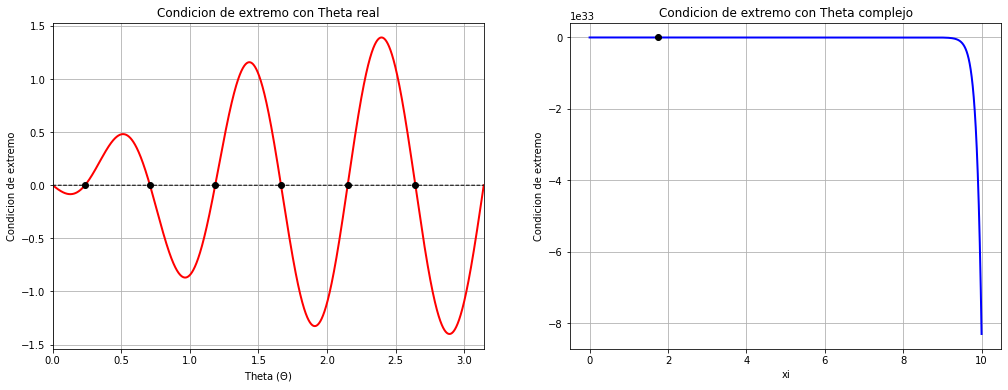

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(17,6))
ax[1].set_xlabel('xi')
ax[1].set_ylabel('Condicion de extremo')
ax[1].set_title('Condicion de extremo con Theta complejo')
ax[0].set_xlabel('Theta ($\Theta$)')
ax[0].set_ylabel('Condicion de extremo')
ax[0].set_title('Condicion de extremo con Theta real')
ax[0].set_xlim([0,np.pi])
ax[1].plot(y, np.real(complejo(y)), color="blue", linewidth=2, linestyle="-")
ax[0].plot(theta, real, color="red", linewidth=2, linestyle="-")
ax[0].plot(theta, theta*0, color="black",linewidth=1,linestyle="--")
ax[0].grid()
ax[1].grid()

for p in range(0,len(raices(theta))):
  ax[0].plot(raices(theta)[p],0,marker="o", color="black")
if len(raiz_imaginaria(y))==1:
  ax[1].plot(raiz_imaginaria(y),0, marker="o", color="black")

Ademas podemos observar como es la distribucion de las masas en el sistema, es decir, graficando $A_n$ para cada modo. Como queremos ver la relacion que hay entre cada masa, solo nos importa graficar el $sin(n\Theta^p)$ para cada p. A continuacion lo hacemos siguiendo con el ejemplo de N=6, en el caso en el que tengo N+1 modos con soluciones reales (tomemos epsilon igual a 1), y en el caso en el que tengo N+1 modos con una de las soluciones compleja (epsilon mucho menor que 1).  

Primero veamos esta distribucion teniendo en cuenta el caso en el que theta es complejo (aprovechando los datos que ya calculamos) .

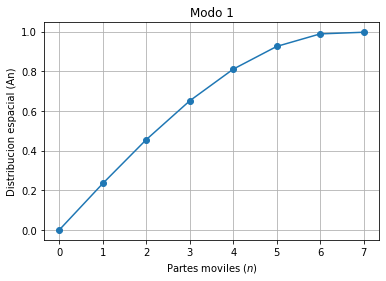

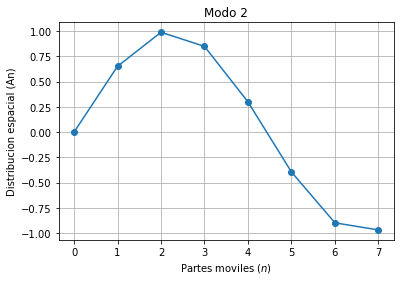

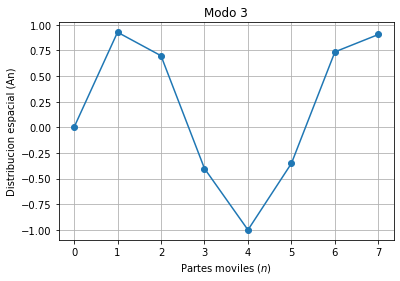

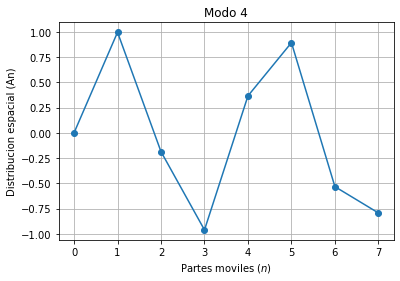

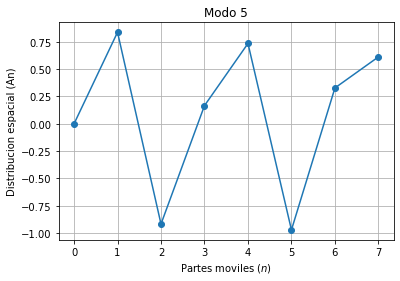

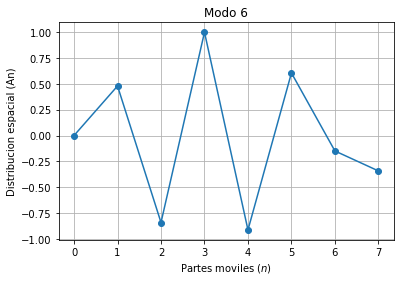

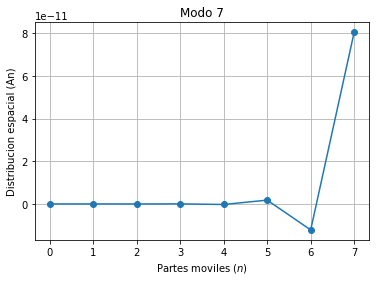

In [ ]:
n=np.linspace(0,N+1,N+2)
for p in range(len(todas_raices)):
  f=np.sin(n*(todas_raices[p]))
  plt.figure()
  plt.title('Modo ' + str(p+1))
  plt.plot(n,np.real(f),marker="o")
  plt.xlabel('Partes moviles ($n$)')
  plt.ylabel('Distribucion espacial (An)')
  plt.grid()


De estas imagenes, es interesante recalcar el modo 7, el cual representa la distribucion de las masas con un theta complejo.Este theta tiene asociada una frecuencia en la zona reactiva, por lo podemos interpretarlo como un modo localizado. No penetra en el sistema y solo afecta a dos partes moviles junto al extremo.

Ahora  grafiquemos la distribucion de modos con valores de theta reales.

In [ ]:
#reescribo parametros y funciones para mayor comodidad
N=6
a=1
M=20
m=20
epsilon=M/m
k=1
theta=np.linspace(0,np.pi,1000000)
y=np.linspace(0,10,1000000)
#funcion con theta real

real=np.sin(N*theta)-(np.sin((N+1)*theta)*(1-4*epsilon*(np.sin(theta/2)**2)))

#funcion con theta complejo
def complejo(y):
  w=(np.pi+(1j*y))
  complejo= (np.exp(-1j*N*w)-np.exp(1j*N*w))-((np.exp(-1j*(N+1)*w)-np.exp(1j*(N+1)*w))*(1+epsilon*(np.exp(-1j*w)+np.exp(1j*w)-2)))
  return (complejo)
##Busco raices reales (espero ver siempre N+1 raices, sino ver raiz compleja)
def raices(theta):
  cambiodesigno=np.where(np.diff(np.sign(real)>0))[0]
  raices=[]
  for i in range(0, len(cambiodesigno)):
    raizi=theta[cambiodesigno[i]]
    raices.append(raizi)
  return (raices)

def raiz_imaginaria(y):
  cambiodesigno1=np.where(np.diff(np.sign(complejo(y))>0))[0]
  raices=[]
  for i in range(0, len(cambiodesigno1)):
    raizi=y[cambiodesigno1[i]]
    raices.append(raizi)
  return (raices)

if len(raiz_imaginaria(y))==1:
  raizcompleja=[np.pi+(raiz_imaginaria(y)[0]*1j)]
else:
  raizcompleja=[]

def frecuencias(theta):
  frecuencias=[]
  for i in range(0, len(raices(theta))):
    fre=np.sqrt(4*(k/m))*(np.sin(raices(theta)[i]/2))
    frecuencias.append(fre)
  return (frecuencias)

def frec_compleja(x):
  frec_compleja=[]
  if len(raiz_imaginaria(y))==1:
    fre1=(4*k/m)**(1/2)*np.cosh((raiz_imaginaria(y)[0])/2)
    frec_compleja.append(fre1)
  return (frec_compleja)
  ##junto raices y frecuencias

todas_raices=raices(theta)+raizcompleja
todas_frecuencias=frecuencias(theta)+frec_compleja(y)


In [ ]:
##Datos recolectados
print("Raices reales=", raices(theta))
print("Raiz compleja=",raizcompleja)
print("Frecuencias=", todas_frecuencias)

Raices reales= [0.20943762528184243, 0.6283160174413225, 1.0471975511965976, 1.4660759433560777, 1.8849543355155576, 2.303832727675038, 2.7227111198345177]
Raiz compleja= []
Frecuencias= [0.04674613070964899, 0.13819606664470085, 0.22360679774997894, 0.29924419991959844, 0.3618032337114529, 0.40854977732967546, 0.4374407886100716]


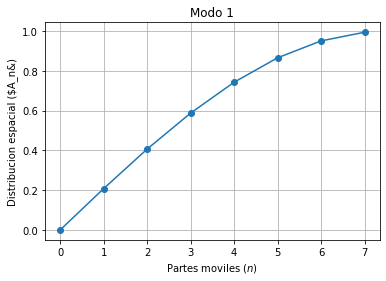

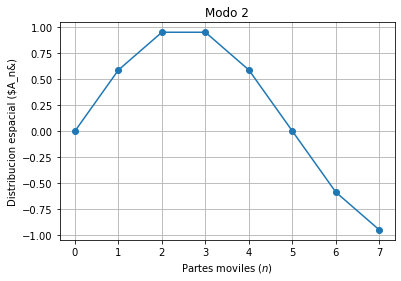

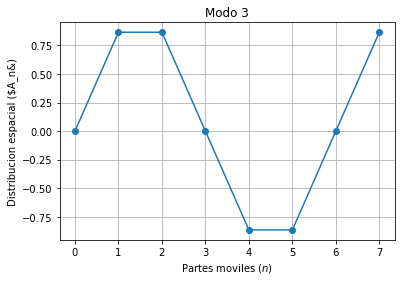

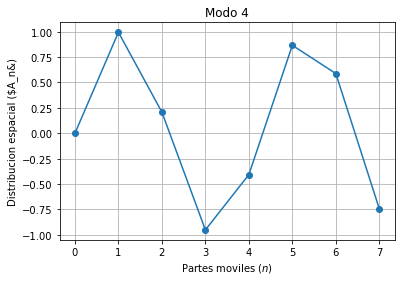

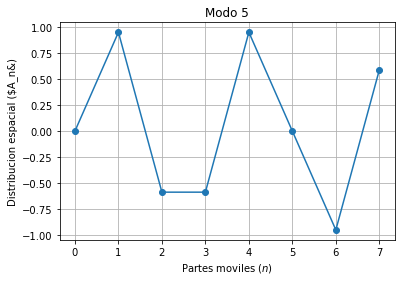

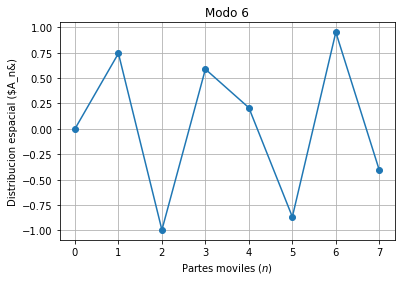

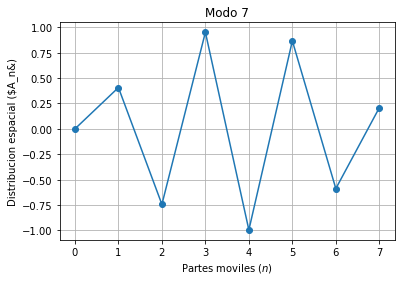

In [ ]:
n=np.linspace(0,N+1,N+2)
for p in range(len(todas_raices)):
  f=np.sin(n*(todas_raices[p]))
  plt.figure()
  plt.title('Modo ' + str(p+1))
  plt.plot(n,np.real(f),marker="o")
  plt.xlabel('Partes moviles ($n$)')
  plt.ylabel('Distribucion espacial ($A_n&)')
  plt.grid()



Con esto finalizo los tres primeros puntos del ejercicio dos y en el Notebook de las condiciones iniciales realizo el punto 4.
